In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sklearn.__version__)


2.3.4
2.3.3
0.13.2
1.7.2


# Load House Price Datasets

In [3]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

In [4]:
housing_data.keys

<function Bunch.keys()>

In [5]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(housing_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
print(housing_data.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(housing_data.data.shape)

(20640, 8)


In [9]:
print(housing_data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


# Prepare Datasets

In [10]:
df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
df["Price"] = housing_data.target

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

# Exploratory Data Analysis

In [15]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


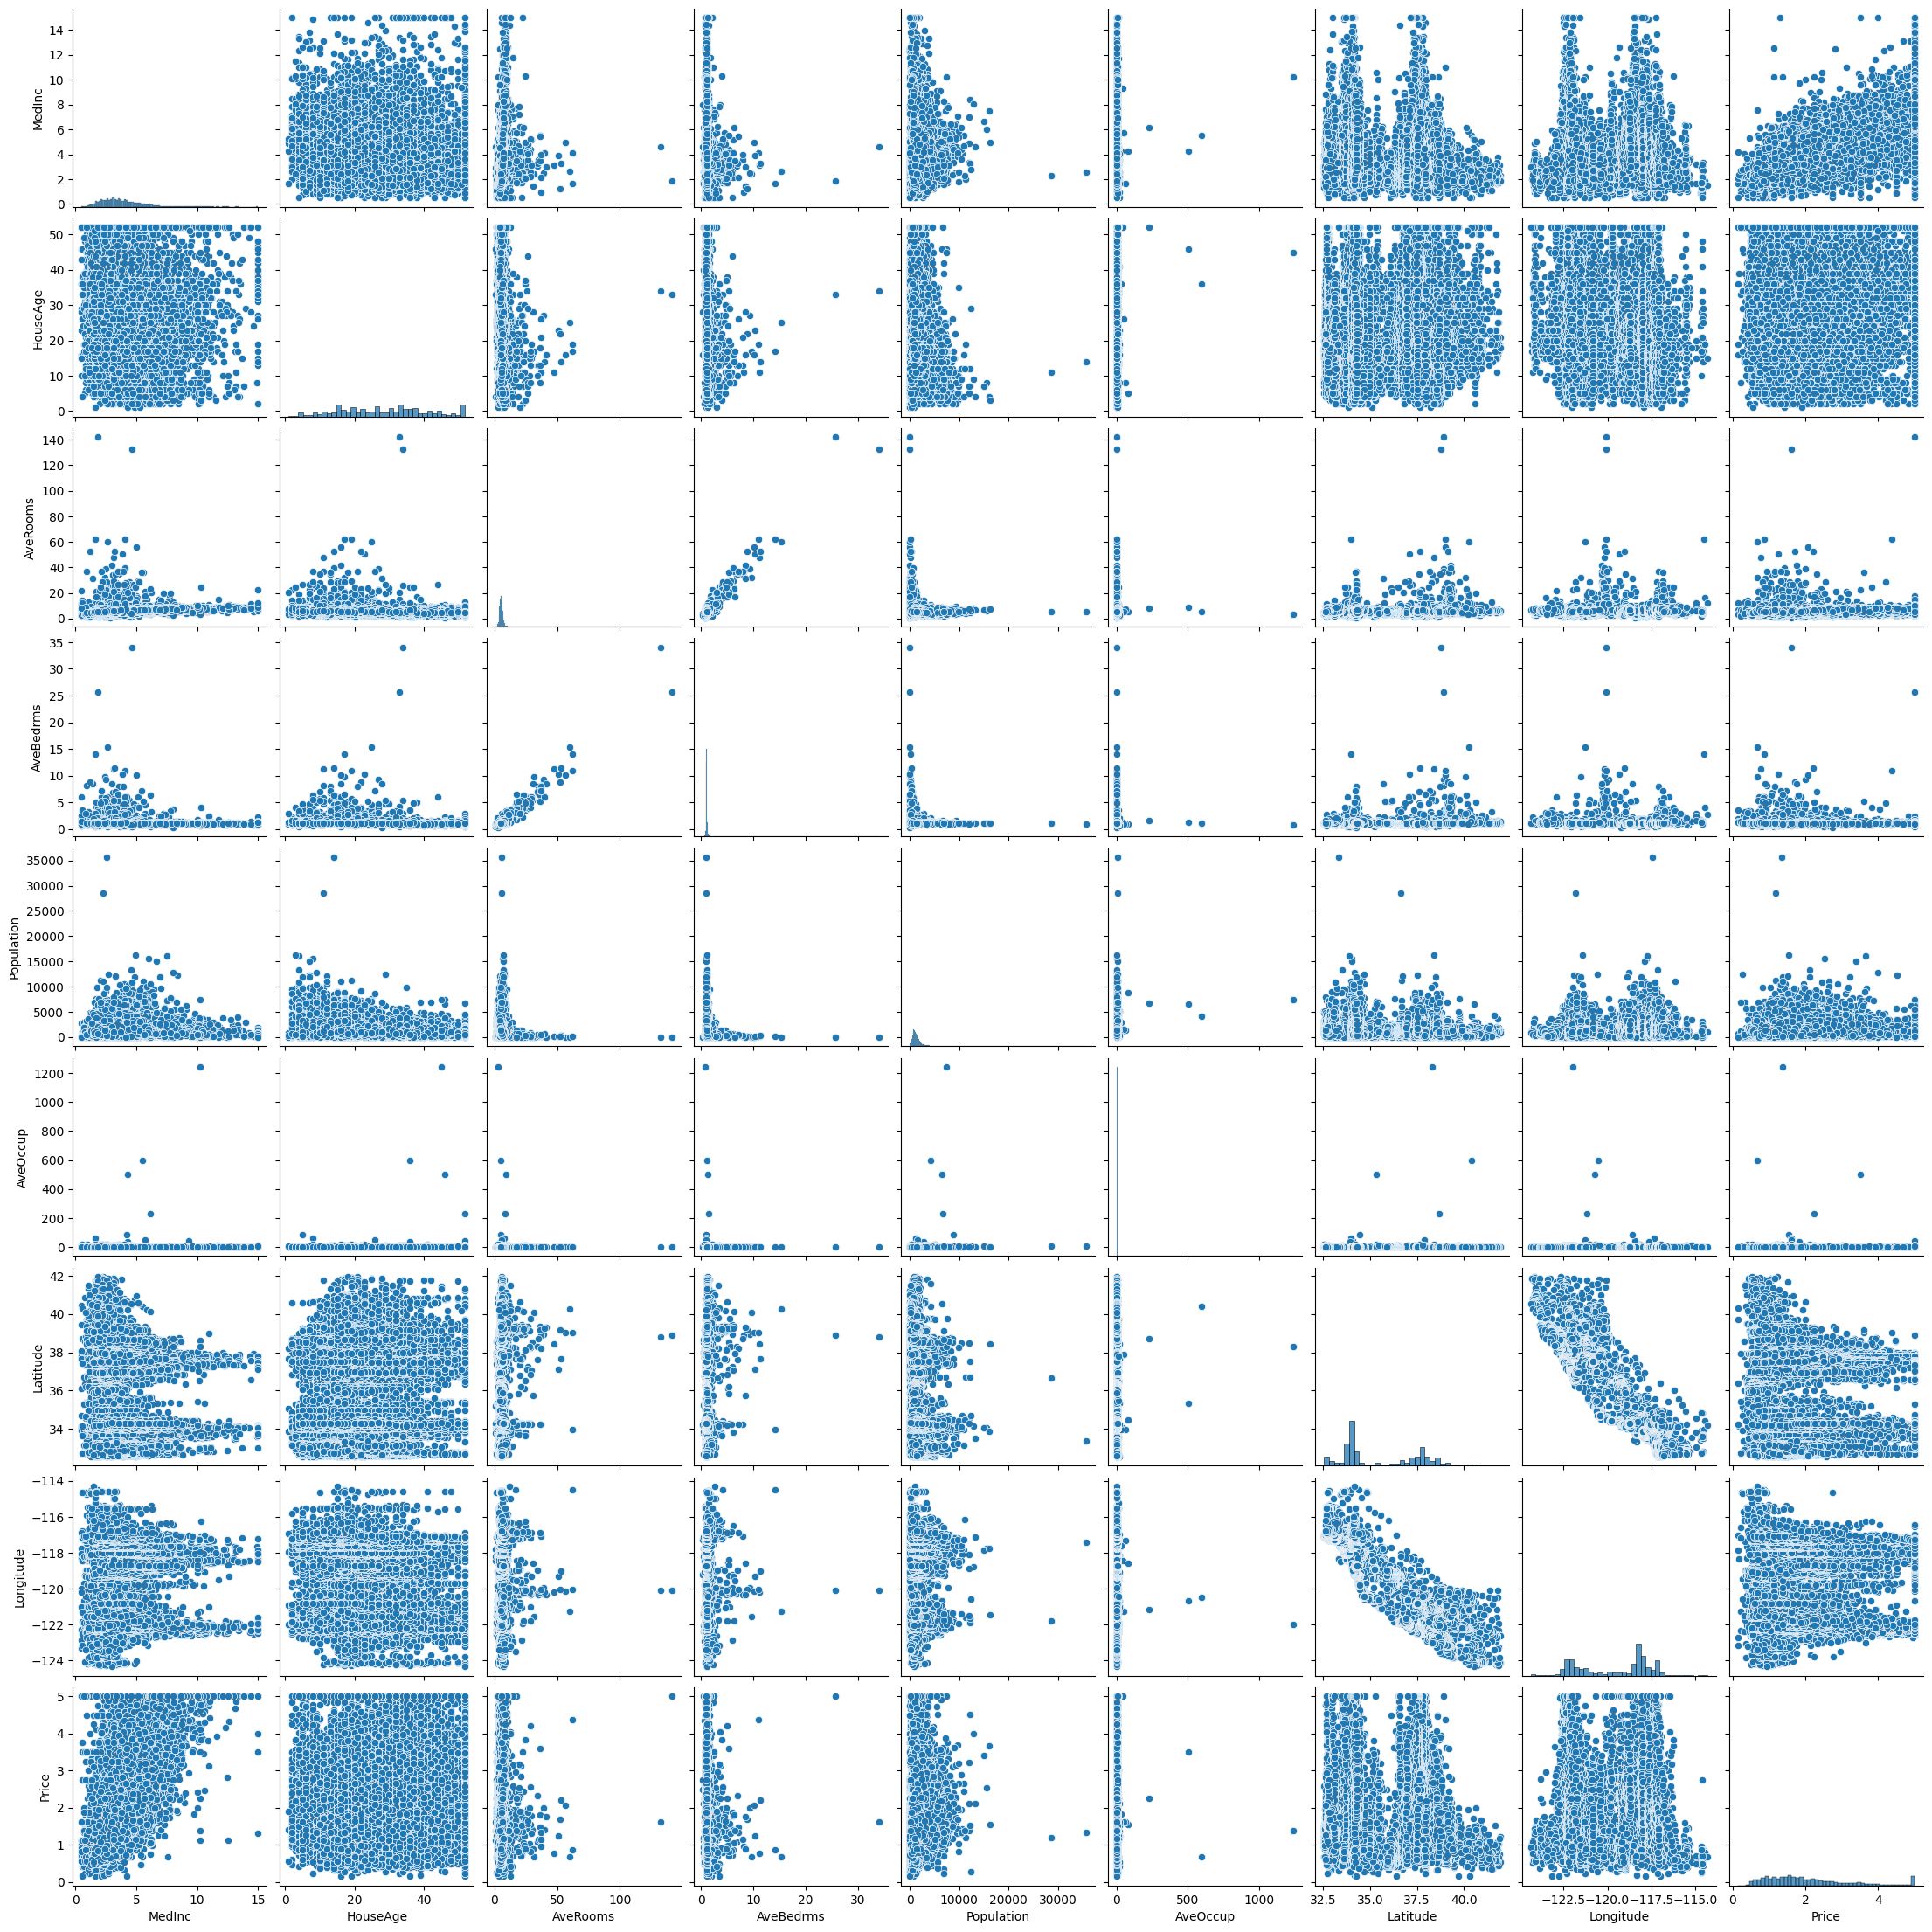

In [16]:
sns.pairplot(df)

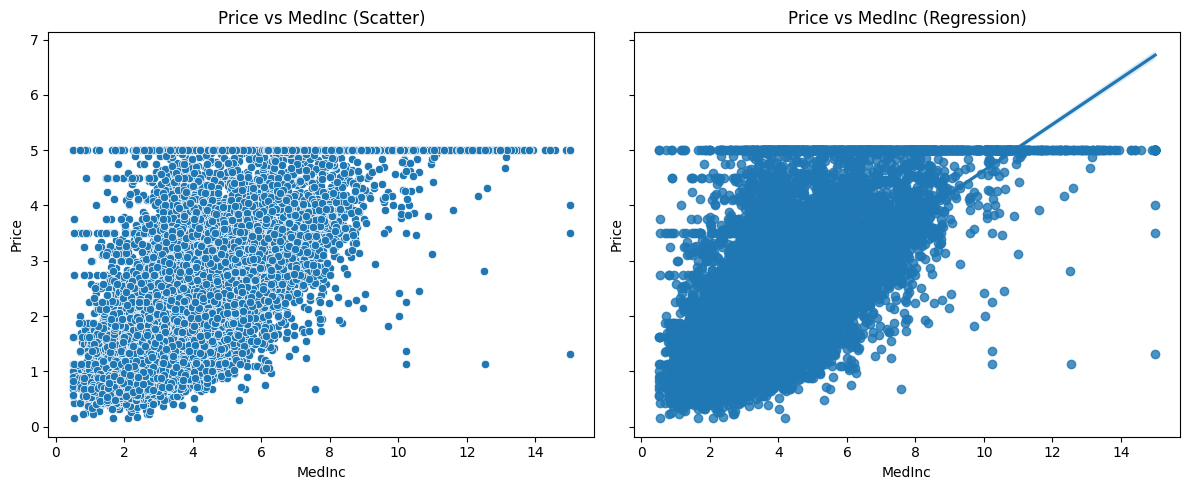

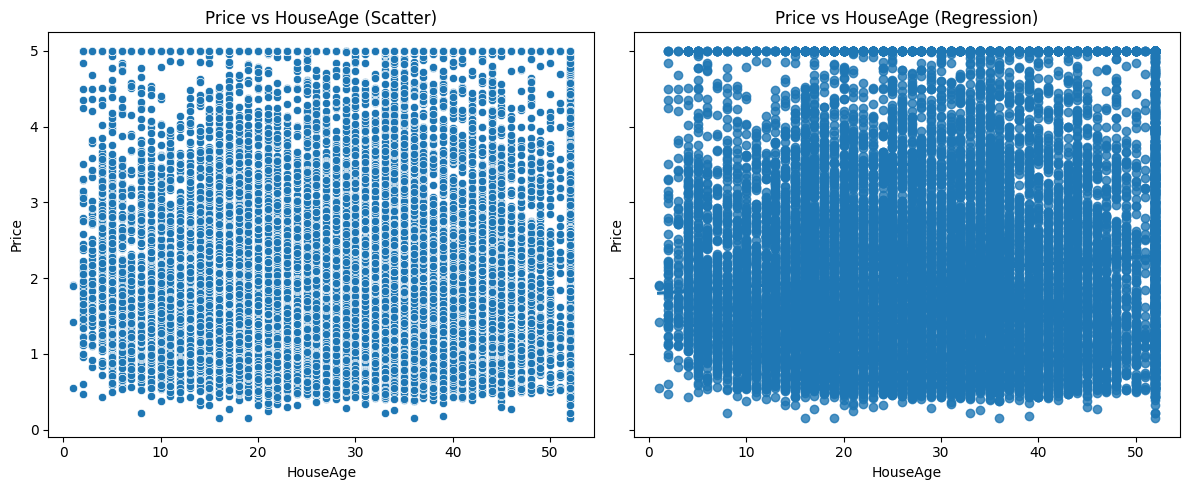

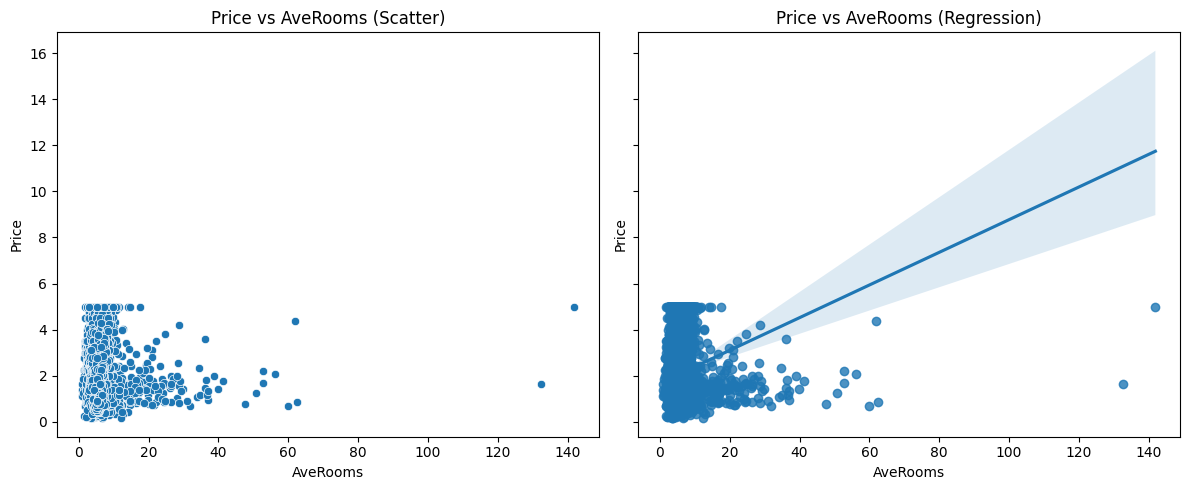

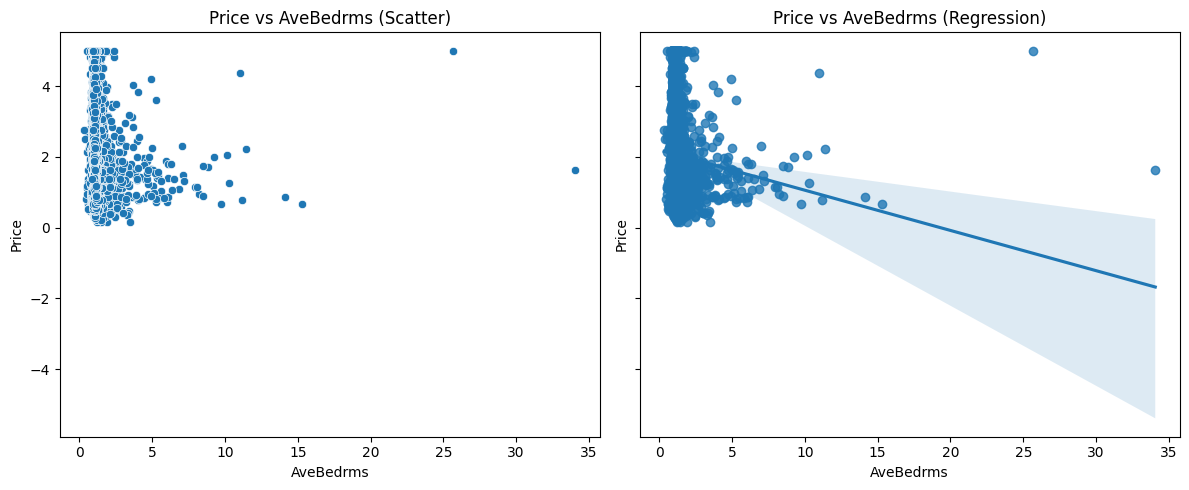

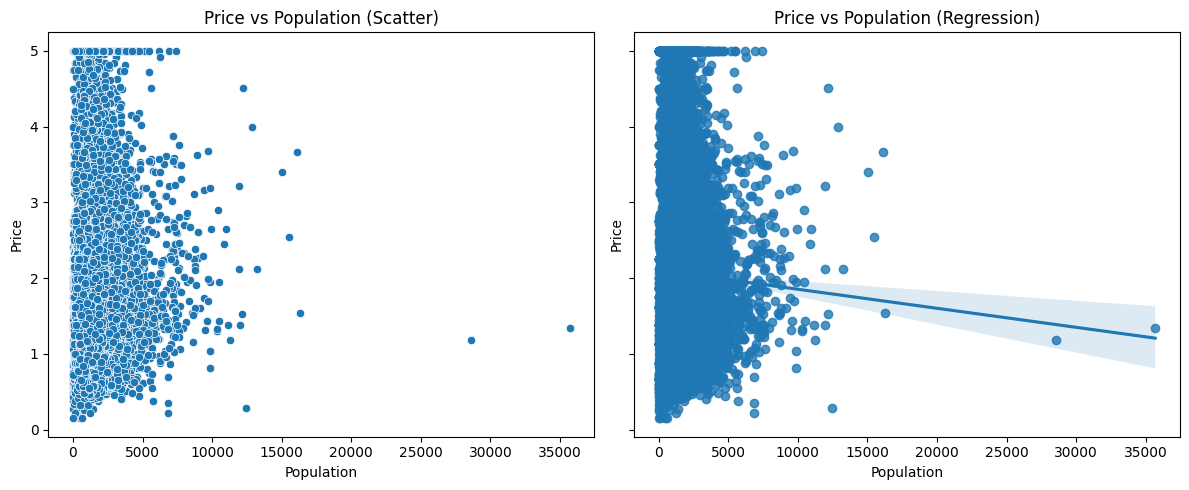

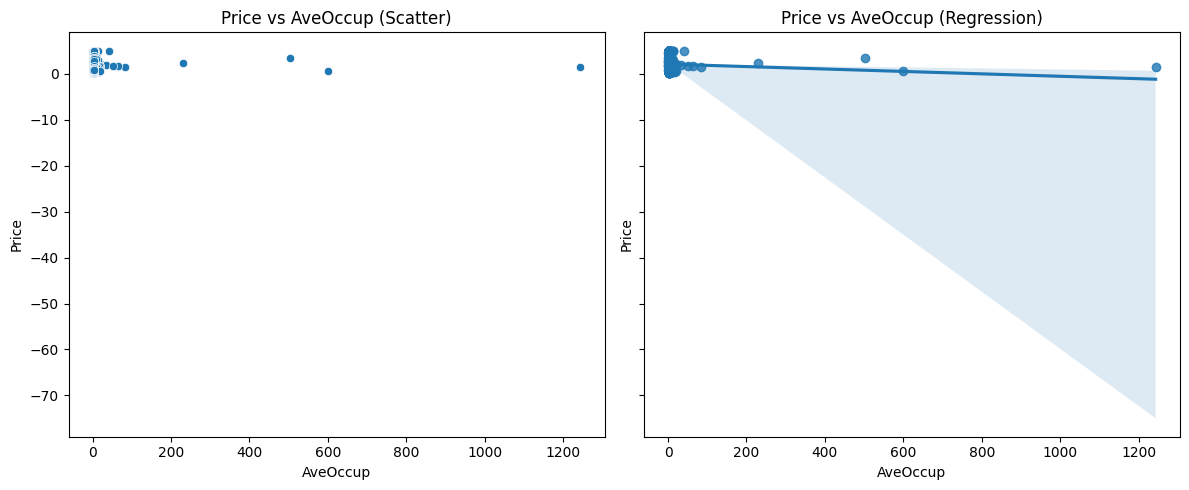

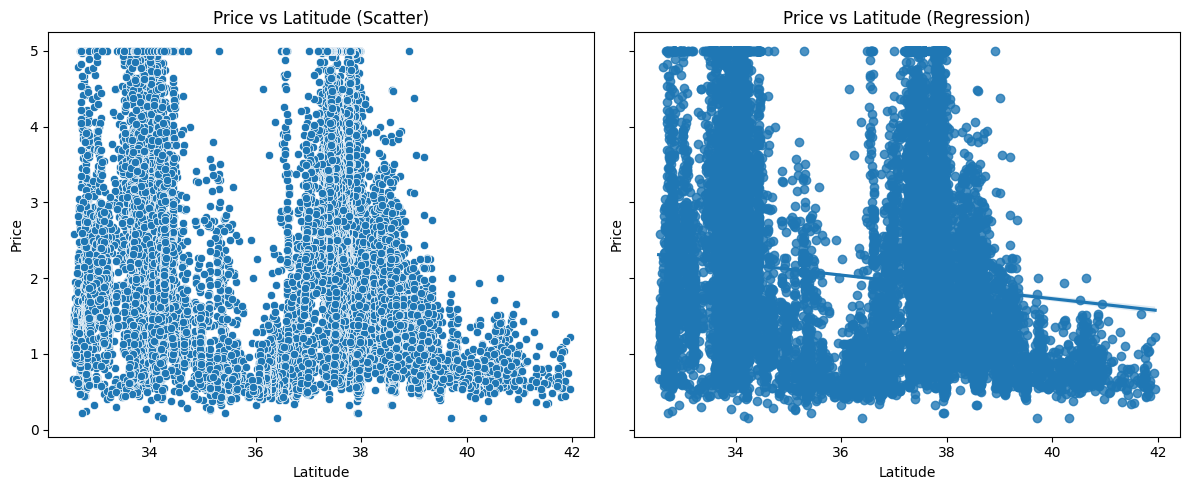

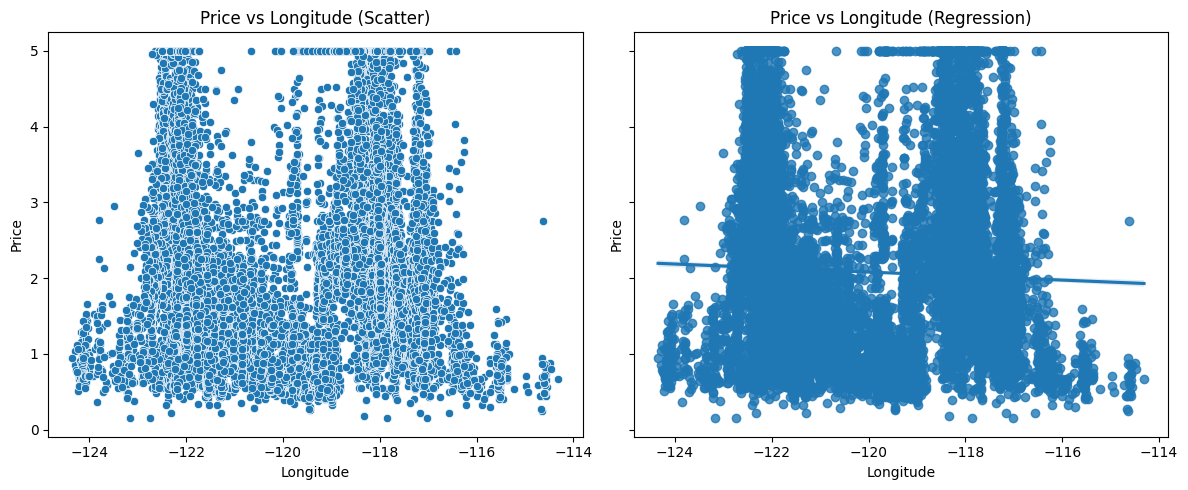

In [17]:

for feature in df.columns[:-1]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

    # Scatter plot
    sns.scatterplot(x=df[feature], y=df["Price"], ax=axes[0])
    axes[0].set_title(f"Price vs {feature} (Scatter)")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Price")

    # Regression plot
    sns.regplot(x=df[feature], y=df["Price"], data=df, ax=axes[1])
    axes[1].set_title(f"Price vs {feature} (Regression)")
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel("Price")

    plt.tight_layout()
    plt.show()


In [18]:
x = df.iloc[:, :-1]
y = df['Price']

In [19]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [23]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
17505,2.9545,47.0,4.195833,1.020833,581.0,2.420833,37.36,-121.90
13512,1.4891,41.0,4.551852,1.118519,994.0,3.681481,34.11,-117.32
10842,3.5120,16.0,3.762287,1.075614,5014.0,2.369565,33.67,-117.91
16559,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28


In [24]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

In [25]:
pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [26]:
y_predict = pipe.predict(X_test)

In [27]:
model = pipe.named_steps['linearregression']

In [28]:
model.coef_

array([ 8.49221760e-01,  1.22119309e-01, -2.99558449e-01,  3.48409673e-01,
       -8.84488134e-04, -4.16980388e-02, -8.93855649e-01, -8.68616688e-01])

In [29]:
model.intercept_

np.float64(2.06923960894241)

In [30]:
mean_squared_error(y_test, y_predict)

0.5305677824766752

In [31]:
mean_absolute_error(y_test, y_predict)

0.5272474538305952

In [32]:
r2_score(y_test, y_predict)

0.5957702326061665

In [33]:
pipe.score(X_train, y_train)

0.6093459727972159

In [34]:
pipe.score(X_test, y_test)

0.5957702326061665

In [35]:
pipe.predict(housing_data.data[1000].reshape(1, -1))

c:\Users\88016\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.94343647])

In [36]:
housing_data.target[1000]

np.float64(1.844)

# Pickling The Model For deployment

In [37]:
import pickle

In [38]:
pickle.dump(pipe, open("House Price Prediction Model.pkl","wb"))

In [39]:
pickled_model = pickle.load(open("House Price Prediction Model.pkl","rb"))

In [44]:
pickled_model.predict(housing_data.data[1000].reshape(1, -1))

c:\Users\88016\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.94343647])